Submission 1 - Prediction competition 2

Importing necessary libraries and displaying basic train and test data.

In [ ]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

pc_train = "pc2_train.csv"
pc_test = "pc2_test.csv"
df = pd.read_csv(pc_train)
df2 = pd.read_csv(pc_test)

# printing column names in a list
print(list(df))

# dropping empty cells from data set
df = df.dropna()
df2 = df2.dropna()

print(df.head())
print(df2.head())

FileNotFoundError: ignored

# Checking which features are relevant to the model using correlation and heatmap

Skewness: -2.846499
Kurtosis: 24.756337 

Index(['LOGVALUE', 'BATHS', 'ROOMS', 'BEDRMS', 'REGION', 'UNITSF', 'BUILT',
       'FLOORS', 'RECRM', 'LAUNDY'],
      dtype='object')


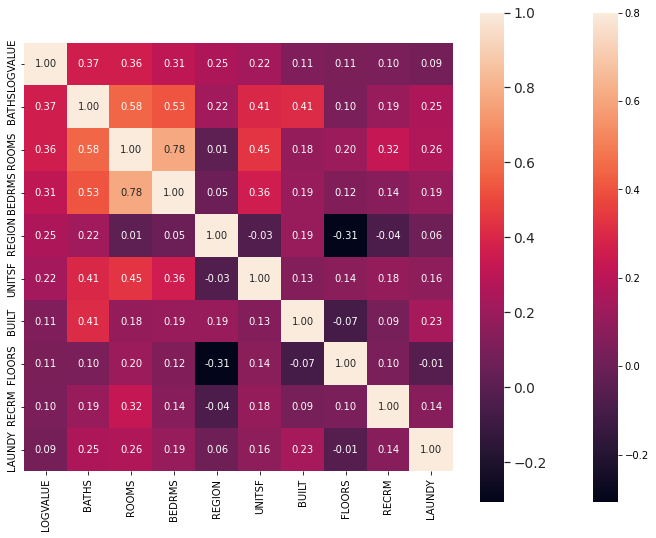

In [ ]:
df["LOGVALUE"].describe()
#histogram
# sns.histplot(df["LOGVALUE"]);

#skewness and kurtosis
print("Skewness: %f" % df["LOGVALUE"].skew())
print("Kurtosis: %f \n" % df["LOGVALUE"].kurt())

# Generating correlation heatmap to view how features are correlated to logprice
corrmat = df.corr()
# print(corrmat[corrmat['LOGVALUE']>0.05].index)
f, ax =  plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'LOGVALUE')['LOGVALUE'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


Training the Model

In [ ]:
# choosing only revelant columns we found in last section
df = df[cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('LOGVALUE', axis=1), df['LOGVALUE'], test_size=0.3, random_state=44)
print(X_train.head())
#  Rescaling data to fit
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)



Linear Regression done for comparison

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train,y_train)
print(lm)


predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

LinearRegression()


Linear Regression scores

In [ ]:
from sklearn import metrics

print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('R^2 score:', metrics.r2_score(y_test, predictions))

MSE: 0.7698396094575491
R^2 score: 0.23016039054245097


Implementing decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
from sklearn import metrics

dtreg = DecisionTreeRegressor(max_depth=6,random_state = 17)
dtreg.fit(X_train, y_train)

dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

Decision Tree scores

In [ ]:
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('R^2 score:', metrics.r2_score(y_test, dtr_pred))

MSE: 0.7168316265061123
R^2 score: 0.2831683734938878


Implementing Kfold and Added flexibility for better results

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

def kfold(n):
#build multiple linear regression model
  X = df.drop('LOGVALUE', axis=1)
  Y = df["LOGVALUE"]
  kfolds = KFold(n_splits=10, random_state = 1, shuffle = True)

  poly = PolynomialFeatures(degree = n)
  X_poly =  poly.fit_transform(X)
  dtreg = DecisionTreeRegressor(max_depth=4,random_state = 10)
  dtreg = dtreg.fit(X_poly,Y)

#use k-fold CV to evaluate model
  scores = cross_val_score(dtreg, X_poly, Y, scoring='neg_mean_squared_error',
                         cv=kfolds, n_jobs=-1)
  scores2 = cross_val_score(dtreg, X_poly, Y, scoring='r2',
                         cv=kfolds, n_jobs=-1)
#view mean absolute error
  print("MSE", end = " : ")
  print(np.mean(np.absolute(scores)))
  print("R^2 Score", end = " : ")
  print(np.mean(np.absolute(scores2)))

  return dtreg


for i in range(1,5):
  print("degree " + str(i))
  kfold(i)
  


degree 1
MSE : 0.8914127091842321
R^2 Score : 0.25602676902824634
degree 2
MSE : 0.8844998260918068
R^2 Score : 0.2615070128629379
degree 3
MSE : 0.888737791395146
R^2 Score : 0.25753277412129894
degree 4
MSE : 0.8877990644713643
R^2 Score : 0.25879036397752564


As inferred from above:
______

Kfold or different flexibility doesnt help improve our already low MSE of 0.66

though with higher degree we get a lower R^2^2 compared to our score of 0.34
_______

SCORES: (best at max depth for decision tree = 6)

MSE: 0.7698396094575491

R^2 score: 0.23016039054245097


_______
Q2
_______
Decision tree - Variable Importance plot


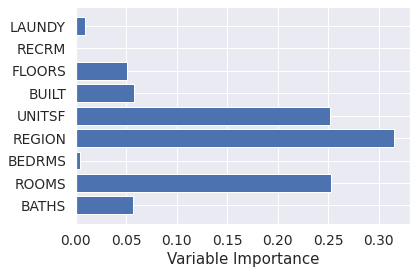

In [ ]:
import matplotlib.pyplot as plt

# Get importance
imp_val = dtreg.feature_importances_
slow =cols[1:]

# Summarize feature importance scores
# Uncomment for values of importance
## for i,v in enumerate(imp_val):
## 	print('Feature: %0d, Score: %.5f' % (i,v))

# Plot feature variable importance
plt.barh(slow, imp_val)
plt.xlabel("Variable Importance")
plt.show()

__________________________________
